一个简单的例子，线性模型$y = \alpha  + \beta x$的演示

# 生成数据

In [1]:
#导入模块
import numpy as np

In [2]:
x = np.random.random(30)
x

array([0.15776762, 0.24734738, 0.67636647, 0.83937224, 0.86284671,
       0.56386565, 0.25399173, 0.27518734, 0.68286287, 0.38632378,
       0.0177291 , 0.89698456, 0.03398356, 0.01232921, 0.70970302,
       0.78713156, 0.77725185, 0.79434512, 0.41780829, 0.27240782,
       0.88305636, 0.45553786, 0.86006356, 0.99742335, 0.06662191,
       0.39168711, 0.6936584 , 0.76632251, 0.07652584, 0.53882636])

In [3]:
help(np.random.random)

Help on built-in function random:

random(...) method of numpy.random.mtrand.RandomState instance
    random(size=None)
    
    Return random floats in the half-open interval [0.0, 1.0). Alias for
    `random_sample` to ease forward-porting to the new random API.



In [4]:
x = 10 * x
x

array([1.57767617, 2.47347383, 6.76366472, 8.39372245, 8.62846712,
       5.63865648, 2.53991732, 2.75187336, 6.82862869, 3.86323777,
       0.17729097, 8.96984565, 0.33983561, 0.1232921 , 7.09703021,
       7.87131559, 7.77251849, 7.94345124, 4.17808288, 2.72407821,
       8.83056357, 4.55537858, 8.60063559, 9.9742335 , 0.66621911,
       3.91687112, 6.93658401, 7.66322505, 0.76525845, 5.38826357])

In [5]:
y = 20*x + 3
y

array([ 34.55352342,  52.46947657, 138.27329445, 170.87444893,
       175.5693424 , 115.77312955,  53.79834648,  58.0374671 ,
       139.57257375,  80.26475545,   6.54581944, 182.39691291,
         9.79671219,   5.46584207, 144.94060413, 160.42631185,
       158.45036972, 161.86902485,  86.56165768,  57.48156428,
       179.61127149,  94.10757155, 175.01271177, 202.4846699 ,
        16.32438217,  81.33742231, 141.73168022, 156.26450104,
        18.3051689 , 110.76527138])

增加扰动项：$y = ax + b + \varepsilon $

In [6]:
y = 20 * x + 3 + np.random.randn(30)
y

array([ 33.37034098,  52.32077929, 137.77534666, 169.86190686,
       175.75315731, 114.97648052,  54.38979557,  57.17348751,
       138.9604552 ,  79.0903937 ,   6.01312679, 182.14019744,
         8.39996317,   5.46191809, 143.95755174, 159.80843401,
       158.04677714, 161.40921959,  85.91029221,  57.20576952,
       179.638184  ,  92.40708415, 176.86578202, 204.21152533,
        16.11198983,  81.67389648, 141.05901374, 155.87277025,
        18.19877925, 110.2996289 ])

## 绘制散点图 

In [7]:
from plotnine import *
import pandas as pd
%matplotlib inline

In [8]:
x_y = pd.DataFrame({'x':x, 'y':y})
x_y.sample(10)

,x,y
13,0.123292,5.461918
19,2.724078,57.205770
26,6.936584,141.059014
18,4.178083,85.910292
28,0.765258,18.198779
9,3.863238,79.090394
20,8.830564,179.638184
1,2.473474,52.320779
17,7.943451,161.409220
23,9.974233,204.211525


In [9]:
x_y.describe()

,x,y
count,30.000000,30.000000
mean,5.131776,105.278802
std,3.120258,62.629616
min,0.123292,5.461918
25%,2.585958,55.085719
50%,5.513460,112.638055
75%,7.846616,159.368020
max,9.974233,204.211525


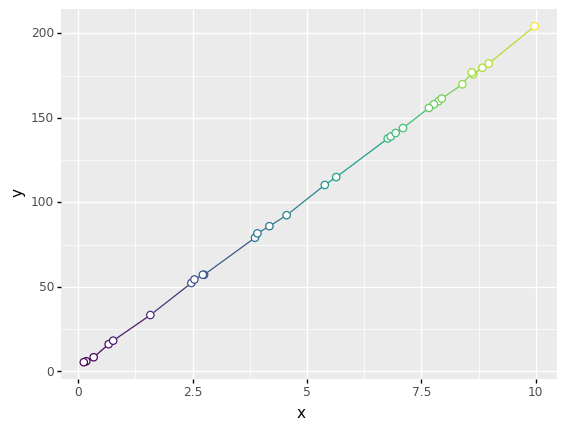

<ggplot: (118167218562)>

In [10]:
(
    ggplot(x_y, aes(x='x', y='y', colour='x+y')) +
    geom_line() +
    geom_point(fill='white', size=2.5) +
    theme(legend_position='none')
)

## 模型拟合

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
reg = LinearRegression()

In [13]:
x = x.reshape(-1, 1)

In [14]:
reg.fit(x, y)

LinearRegression()

In [15]:
print("Fitted lm model is y={:.3}x+{:.3}".format(reg.coef_[0], reg.intercept_))

Fitted lm model is y=20.1x+2.28


## 拟合效果

In [16]:
yhat = reg.predict(x)
yhat

array([ 33.94609875,  51.92523956, 138.03167836, 170.74781363,
       175.45926549, 115.45215777,  53.25879624,  57.51286779,
       139.33554007,  79.81854942,   5.83961458, 182.3109161 ,
         9.10197288,   4.75582824, 144.72250292, 160.26282708,
       158.27991601, 161.71062838,  86.13766015,  56.95500436,
       179.51545003,  93.71018765, 174.90067168, 202.46952048,
        15.65266526,  80.89499946, 141.50226148, 156.08633801,
        17.64043801, 110.42663741])

In [18]:
x_y_yhat = pd.DataFrame({'x':x.flatten(), 'y':y, 'yhat':yhat})

In [26]:
x_y_yhat_melt = pd.melt(x_y_yhat, id_vars='x', var_name='y_type', value_name='value')
x_y_yhat_melt.sample(10)

,x,y_type,value
32,6.763665,yhat,138.031678
49,2.724078,yhat,56.955004
16,7.772518,y,158.046777
48,4.178083,yhat,86.137660
56,6.936584,yhat,141.502261
15,7.871316,y,159.808434
55,3.916871,yhat,80.894999
54,0.666219,yhat,15.652665
0,1.577676,y,33.370341
18,4.178083,y,85.910292


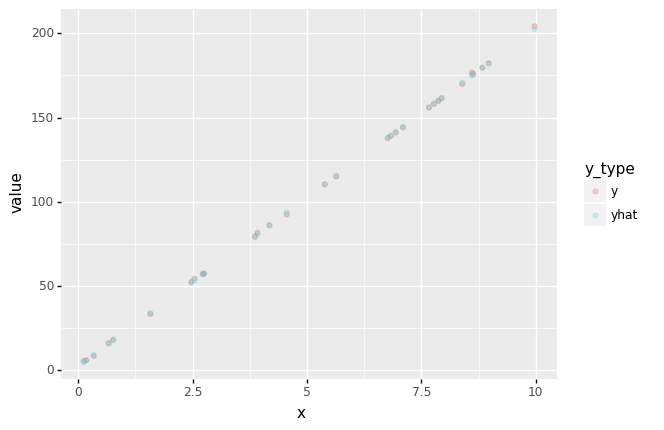

<ggplot: (118167233359)>

In [20]:
(
    ggplot(x_y_yhat_melt, aes(x='x', y='value', colour='y_type')) +
    geom_point(alpha=0.25)
)

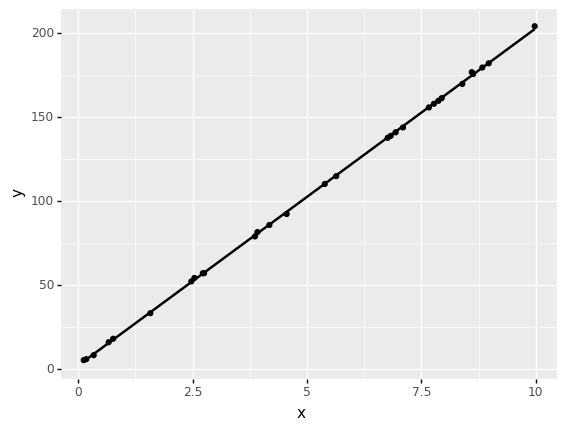

<ggplot: (118167891167)>

In [21]:
(
    ggplot(x_y, aes(x='x', y='y')) +
    geom_point() +
    geom_smooth(method='lm')
),

In [22]:
from statsmodels.api import OLS

In [23]:
lm2 = OLS(x, y).fit()

In [24]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.273e+05
Date:                Tue, 16 Mar 2021   Prob (F-statistic):                    5.01e-58
Time:                        16:34:56   Log-Likelihood:                          38.290
No. Observations:                  30   AIC:                                     -74.58
Df Residuals:                      29   BIC:                                     -73.18
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0490      0.000    476.791      0.000       0.049       0.049
==============================================================================
Omnibus:                        5.912   Durbin-Watson:                   1.584
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                2.466
Skew:                          -0.382   Prob(JB):                        0.291
Kurtosis:                       1.822   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""